In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file='bank.csv'
bank_df = pd.read_csv('bank.csv', header=None,skiprows=1)
bank_df = bank_df[0].str.split(';', expand=True)
bank_df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [5]:
bank_df['balance'] = bank_df['balance'].astype(float)
bank_df['balance'] = bank_df['balance'].replace(',', '.', regex=True)
bank_df['age'] = bank_df['age'].astype(int)
bank_df['age'] = bank_df['age'].replace(' ', '0', regex=True)
bank_df['day'] = bank_df['day'].astype(int)
bank_df['day'] = bank_df['day'].replace(' ', '0', regex=True)
bank_df['campaign'] = bank_df['campaign'].astype(int)
bank_df['campaign'] = bank_df['campaign'].replace(' ', '0', regex=True)
bank_df['pdays'] = bank_df['pdays'].astype(int)
bank_df['pdays'] = bank_df['pdays'].replace(' ', '0', regex=True)
bank_df['previous'] = bank_df['previous'].astype(int)
bank_df['previous'] = bank_df['previous'].replace(' ', '0', regex=True)
bank_df['duration'] = bank_df['duration'].astype(int)
bank_df['duration'] = bank_df['duration'].replace(' ', '0', regex=True)

In [6]:
num=bank_df.select_dtypes(include=[np.number]).columns
cat=bank_df.select_dtypes(exclude=[np.number]).columns

In [8]:
num

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [7]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
balance_data=bank_df['balance']
balance_data
balance_25p=np.percentile(balance_data, 25)


**Percentile**

- 25 percentage of data less than 69.000000
- 25percentage of data =25*4521/100= 1130.25
- 6370 members has salary less than 1130.25

In [ ]:
**Percentile**

- 25 percentage of data less than 4521.000000
- 25 percentage of data =25*4521/100= 1130.25
- 6370 members has salary less than 1130.25

In [30]:
con=balance_data<balance_25p
val= bank_df[con]
print(val)
len(val)

      age              job     marital    education default  balance housing  \
4      59    "blue-collar"   "married"  "secondary"    "no"      0.0   "yes"   
9      43       "services"   "married"    "primary"    "no"    -88.0   "yes"   
18     25    "blue-collar"    "single"    "primary"    "no"   -221.0   "yes"   
20     38     "management"  "divorced"    "unknown"    "no"      0.0   "yes"   
21     42     "management"  "divorced"   "tertiary"    "no"     16.0    "no"   
...   ...              ...         ...          ...     ...      ...     ...   
4497   31   "entrepreneur"    "single"   "tertiary"    "no"     38.0    "no"   
4502   42       "services"   "married"  "secondary"    "no"    -91.0   "yes"   
4506   42     "unemployed"  "divorced"   "tertiary"    "no"   -166.0    "no"   
4516   33       "services"   "married"  "secondary"    "no"   -333.0   "yes"   
4517   57  "self-employed"   "married"   "tertiary"   "yes"  -3313.0   "yes"   

       loan     contact  day  month  du

1129

In [9]:
day_data=bank_df['day']
day_data
day_25p=np.percentile(day_data, 25)

In [28]:
con=day_data<day_25p
val= bank_df[con]
type(val)
print(val)
len(val)

      age             job    marital    education default  balance housing  \
3      30    "management"  "married"   "tertiary"    "no"   1476.0   "yes"   
4      59   "blue-collar"  "married"  "secondary"    "no"      0.0   "yes"   
7      39    "technician"  "married"  "secondary"    "no"    147.0   "yes"   
19     31      "services"  "married"  "secondary"    "no"    132.0    "no"   
23     44  "entrepreneur"  "married"  "secondary"    "no"     93.0    "no"   
...   ...             ...        ...          ...     ...      ...     ...   
4493   28    "technician"   "single"   "tertiary"    "no"      0.0   "yes"   
4502   42      "services"  "married"  "secondary"    "no"    -91.0   "yes"   
4515   32      "services"   "single"  "secondary"    "no"    473.0   "yes"   
4519   28   "blue-collar"  "married"  "secondary"    "no"   1137.0    "no"   
4520   44  "entrepreneur"   "single"   "tertiary"    "no"   1136.0   "yes"   

       loan     contact  day  month  duration  campaign  pdays 

1123

**Emperical Rule**
- u-1sigma to u+1sigma 68 % of data
- u-2sigma to u+2sigma 95% of data
- u-3sigma to u+3sigma 98% of data

In [10]:
balance_data=bank_df['balance']
balance_data_mean= np.mean(balance_data)
balance_data_std= np.std(balance_data)
balance_data_68=np.percentile(balance_data, 68)
print(balance_data_mean)
lb=balance_data_mean - balance_data_std
ub=balance_data_mean + balance_data_std
con1=balance_data>lb
con2=balance_data<ub
val1= bank_df[con1 & con2]
len(val1)

1422.6578190665782


4143

In [11]:
balance_data=bank_df['balance']
balance_data_mean= np.mean(balance_data)
balance_data_std= np.std(balance_data)
balance_data_68=np.percentile(balance_data, 68)
print(balance_data_mean)
lb=balance_data_mean - balance_data_std
ub=balance_data_mean + balance_data_std
con1=balance_data>lb
con2=balance_data<ub
val1= bank_df[con1 & con2]
len(val1)

1422.6578190665782


4143

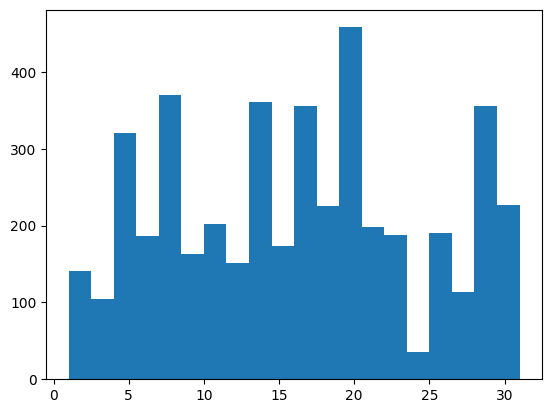

In [38]:
counts,intervals,bin =plt.hist(bank_df['day'], bins=20)

In [36]:
day_data = bank_df['day']
day_data_mean = np.mean(day_data)
day_data_std = np.std(day_data)
day_data_68 = np.percentile(day_data, 68)
print(day_data_mean)
lb = day_data_mean - day_data_std
ub = day_data_mean + day_data_std
con1 = day_data > lb
con2 = day_data < ub
val1 = bank_df[con1 & con2]
len(val1)

15.915284229152842


2692

**Here Emperical is not followed**
**Emperical not followed means Skewed**
**we need to draw Histogram to check this ,skewed**

In [41]:
print(counts)
print(intervals)

[141. 105. 320. 187. 370. 163. 202. 151. 361. 174. 355. 226. 458. 198.
 188.  36. 190. 113. 356. 227.]
[ 1.   2.5  4.   5.5  7.   8.5 10.  11.5 13.  14.5 16.  17.5 19.  20.5
 22.  23.5 25.  26.5 28.  29.5 31. ]


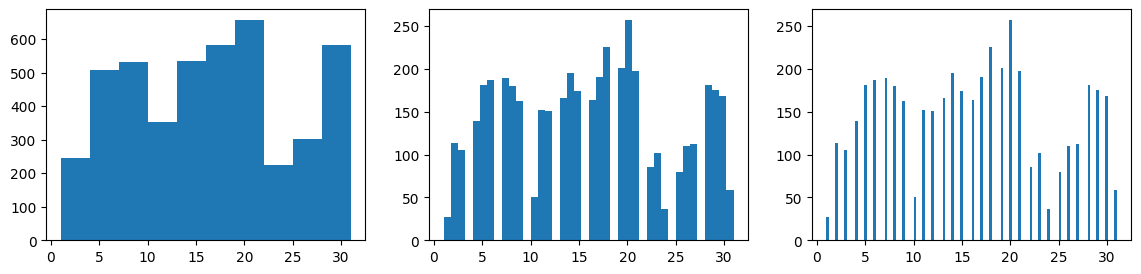

In [42]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
counts,intervals,bin = plt.hist(day_data)
plt.subplot(1,3,2)
counts,intervals,bin = plt.hist(day_data,bins=40)
plt.subplot(1,3,3)
counts,intervals,bin = plt.hist(day_data,bins=100)
plt.show()

**sns.histplot**

<Axes: xlabel='day', ylabel='Count'>

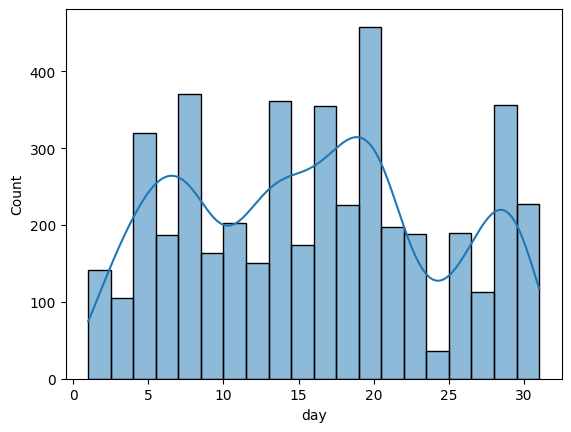

In [43]:
import warnings
warnings.filterwarnings('ignore')
sns.histplot(bank_df['day'], bins=20, kde=True)

<Axes: xlabel='day', ylabel='Density'>

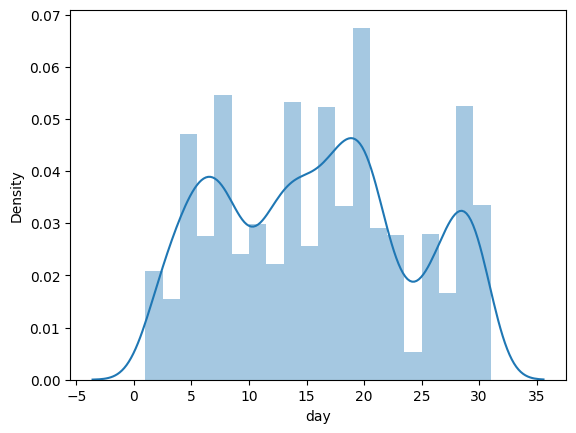

In [44]:
sns.distplot(bank_df['day'], bins=20, kde=True)

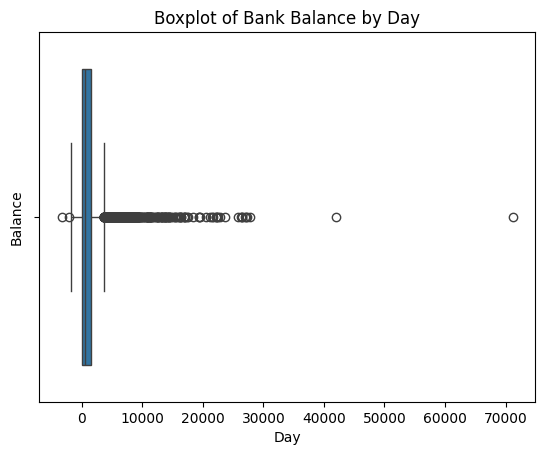

In [20]:
sns.boxplot(data=balance_data, orient='h')
plt.title('Boxplot of Bank Balance by Day')
plt.xlabel('Day')
plt.ylabel('Balance')
plt.show()

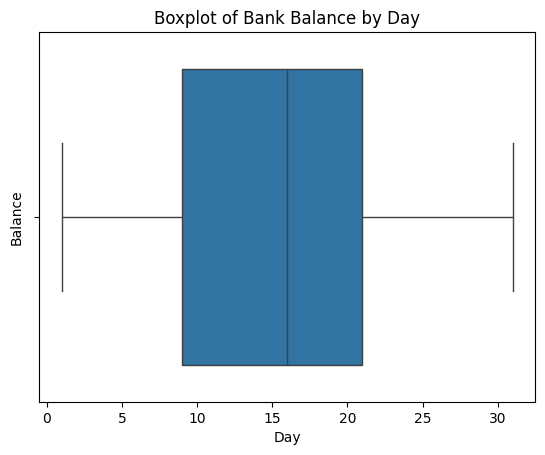

In [ ]:
sns.boxplot(data=day_data, orient='h')
plt.title('Boxplot of Bank Balance by Day')
plt.xlabel('Day')
plt.ylabel('Balance')
plt.show()

In [22]:
balance_data

0       1787.0
1       4789.0
2       1350.0
3       1476.0
4          0.0
         ...  
4516    -333.0
4517   -3313.0
4518     295.0
4519    1137.0
4520    1136.0
Name: balance, Length: 4521, dtype: float64

In [23]:
day_data

0       19
1       11
2       16
3        3
4        5
        ..
4516    30
4517     9
4518    19
4519     6
4520     3
Name: day, Length: 4521, dtype: int64

- Find the no of outliers from box plot
- Get outloer data & without outliers data separately boxplot

In [28]:
balance_data=bank_df['balance']
balance_data_mean= np.mean(balance_data)
balance_data_std= np.std(balance_data)
balance_data_50=np.percentile(balance_data, 50)
balance_data_75=np.percentile(balance_data, 75)
balance_data_25=np.percentile(balance_data, 25)
iqr=balance_data_75-balance_data_25
print(balance_data_mean)

1422.6578190665782


- in box plot outliers lies from q3+1.5(iqr) and q1-1.5(iqr)

In [31]:
con1=balance_data<(balance_data_25-1.5*iqr)
con2=balance_data>(balance_data_75+1.5*iqr)
con =con1 | con2
val= bank_df[con]
print(val)


      age              job     marital    education default  balance housing  \
1      33       "services"   "married"  "secondary"    "no"   4789.0   "yes"   
10     39       "services"   "married"  "secondary"    "no"   9374.0   "yes"   
16     56     "technician"   "married"  "secondary"    "no"   4073.0    "no"   
25     41     "management"   "married"   "tertiary"    "no"   5883.0    "no"   
30     68        "retired"  "divorced"  "secondary"    "no"   4189.0    "no"   
...   ...              ...         ...          ...     ...      ...     ...   
4464   53       "services"  "divorced"  "secondary"    "no"   4554.0    "no"   
4473   33     "technician"   "married"  "secondary"    "no"   4790.0   "yes"   
4489   45     "management"   "married"   "tertiary"    "no"   6945.0    "no"   
4500   38         "admin."   "married"  "secondary"    "no"   4196.0   "yes"   
4517   57  "self-employed"   "married"   "tertiary"   "yes"  -3313.0   "yes"   

       loan      contact  day  month  d

In [32]:
outliers=balance_data[con]
print(outliers)
len(outliers)

1       4789.0
10      9374.0
16      4073.0
25      5883.0
30      4189.0
         ...  
4464    4554.0
4473    4790.0
4489    6945.0
4500    4196.0
4517   -3313.0
Name: balance, Length: 506, dtype: float64


506

In [33]:
#data without outliers
con1=balance_data>(balance_data_25-1.5*iqr)
con2=balance_data<(balance_data_75+1.5*iqr)
con =con1 & con2
val= bank_df[con]
print(val)


      age             job    marital    education default  balance housing  \
0      30    "unemployed"  "married"    "primary"    "no"   1787.0    "no"   
2      35    "management"   "single"   "tertiary"    "no"   1350.0   "yes"   
3      30    "management"  "married"   "tertiary"    "no"   1476.0   "yes"   
4      59   "blue-collar"  "married"  "secondary"    "no"      0.0   "yes"   
5      35    "management"   "single"   "tertiary"    "no"    747.0    "no"   
...   ...             ...        ...          ...     ...      ...     ...   
4515   32      "services"   "single"  "secondary"    "no"    473.0   "yes"   
4516   33      "services"  "married"  "secondary"    "no"   -333.0   "yes"   
4518   57    "technician"  "married"  "secondary"    "no"    295.0    "no"   
4519   28   "blue-collar"  "married"  "secondary"    "no"   1137.0    "no"   
4520   44  "entrepreneur"   "single"   "tertiary"    "no"   1136.0   "yes"   

       loan     contact  day  month  duration  campaign  pdays 

In [34]:
non_outliers=balance_data[con]
print(non_outliers)
len(non_outliers)

0       1787.0
2       1350.0
3       1476.0
4          0.0
5        747.0
         ...  
4515     473.0
4516    -333.0
4518     295.0
4519    1137.0
4520    1136.0
Name: balance, Length: 4015, dtype: float64


4015

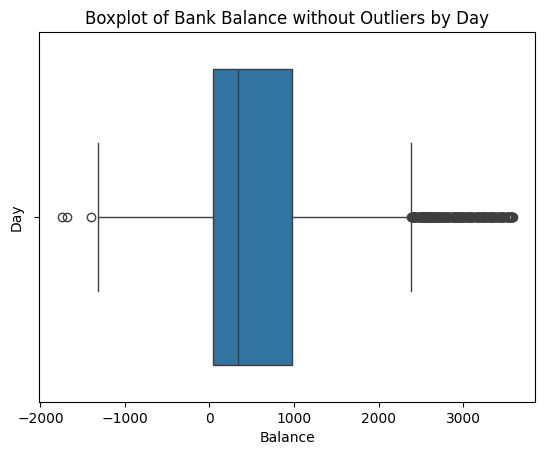

In [35]:
sns.boxplot(data=non_outliers, orient='h')
plt.title('Boxplot of Bank Balance without Outliers by Day')
plt.xlabel('Balance')
plt.ylabel('Day')
plt.show()

In [37]:
list1=[]
for k in balance_data:
    if k in outliers:
        list1.append(np.median(balance_data))
    else:
        list1.append(k)
print(list1)


[1787.0, 4789.0, 1350.0, 1476.0, 0.0, 747.0, 307.0, 147.0, np.float64(444.0), -88.0, 9374.0, 264.0, 1109.0, 502.0, 360.0, np.float64(444.0), 4073.0, np.float64(444.0), -221.0, 132.0, 0.0, np.float64(444.0), 106.0, np.float64(444.0), 543.0, 5883.0, 627.0, np.float64(444.0), 784.0, 105.0, 4189.0, 171.0, 42.0, 2536.0, 1235.0, 1811.0, 229.0, 2089.0, 3935.0, 363.0, 11971.0, 553.0, 1117.0, 396.0, 2204.0, 872.0, 145.0, 0.0, -849.0, 4629.0, 844.0, 228.0, 50.0, 1539.0, 2231.0, 3064.0, 82.0, 2155.0, 101.0, 784.0, -516.0, 415.0, 5887.0, 1355.0, 16873.0, 203.0, 338.0, 444.0, 0.0, 360.0, 0.0, 2.0, 6248.0, np.float64(444.0), 344.0, np.float64(444.0), np.float64(444.0), 591.0, 388.0, 219.0, 451.0, 5.0, 177.0, 657.0, 1315.0, 1466.0, 879.0, 293.0, 424.0, 1831.0, 111.0, 455.0, -195.0, 3616.0, 14093.0, 1567.0, 5426.0, 261.0, 2843.0, 406.0, 0.0, 493.0, 5996.0, 3777.0, 524.0, 574.0, np.float64(444.0), 483.0, 3391.0, 0.0, 2488.0, 1517.0, 217.0, 22.0, 331.0, 505.0, 1808.0, 4111.0, 52.0, np.float64(444.0), 18

In [38]:
balance_data.describe()

count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64

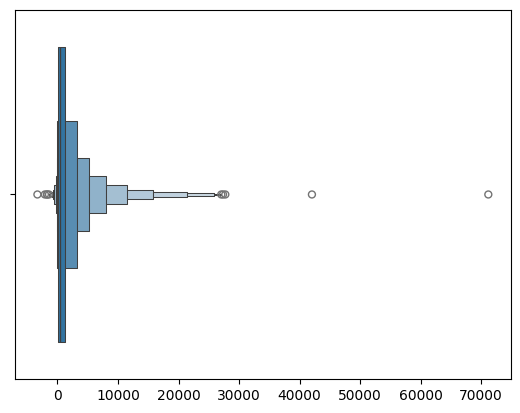

In [39]:
sns.boxenplot(list1,orient='h')
plt.show()

<Axes: ylabel='Count'>

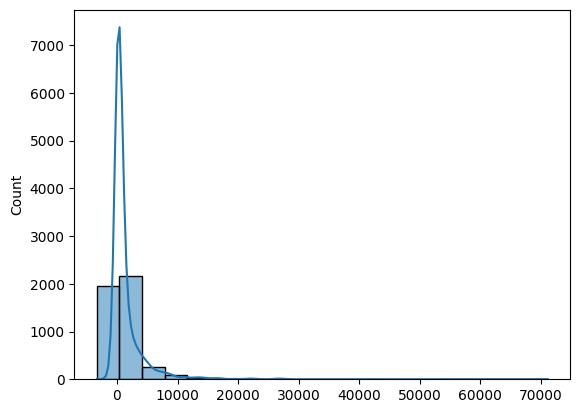

In [40]:
sns.histplot(list1, bins=20, kde=True)